# Unit 5 - Financial Planning

In [1]:
# Initial imports

import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables

load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2

my_eth = 5.3

In [4]:
# Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"

eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

requests.get(btc_url)

# Fetch current ETH price

requests.get(eth_url)
btc = requests.get(btc_url)
eth = requests.get(eth_url)
data_btc = btc.json()
data_eth = eth.json()

In [6]:
#Code to display data_btc which shows the price of BTC

data_btc

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18741143,
   'total_supply': 18741143,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 33967.0,
     'volume_24h': 60528567829,
     'market_cap': 636261553385,
     'percentage_change_1h': -1.08358981973532,
     'percentage_change_24h': 7.91254885588106,
     'percentage_change_7d': -15.8773235720835,
     'percent_change_1h': -1.08358981973532,
     'percent_change_24h': 7.91254885588106,
     'percent_change_7d': -15.8773235720835},
    'CAD': {'price': 41708.0793,
     'volume_24h': 74323028437.2291,
     'market_cap': 781265561401.441,
     'percent_change_1h': -1.08358981973532,
     'percent_change_24h': 7.91254885588106,
     'percent_change_7d': -15.8773235720835}},
   'last_updated': 1624449564}},
 'metadata': {'timestamp': 1624449564,
  'num_cryptocurrencies': 1281,
  'error': None}}

In [7]:
#The below code is used to determine what are the keys in the dictionary and then iterate through and fetch BTC price

data_btc.keys()

dict_keys(['data', 'metadata'])

In [8]:
data_btc["data"].keys()

dict_keys(['1'])

In [9]:
data_btc["data"] ["1"]

{'id': 1,
 'name': 'Bitcoin',
 'symbol': 'BTC',
 'website_slug': 'bitcoin',
 'rank': 1,
 'circulating_supply': 18741143,
 'total_supply': 18741143,
 'max_supply': 21000000,
 'quotes': {'USD': {'price': 33967.0,
   'volume_24h': 60528567829,
   'market_cap': 636261553385,
   'percentage_change_1h': -1.08358981973532,
   'percentage_change_24h': 7.91254885588106,
   'percentage_change_7d': -15.8773235720835,
   'percent_change_1h': -1.08358981973532,
   'percent_change_24h': 7.91254885588106,
   'percent_change_7d': -15.8773235720835},
  'CAD': {'price': 41708.0793,
   'volume_24h': 74323028437.2291,
   'market_cap': 781265561401.441,
   'percent_change_1h': -1.08358981973532,
   'percent_change_24h': 7.91254885588106,
   'percent_change_7d': -15.8773235720835}},
 'last_updated': 1624449564}

In [10]:
data_btc["data"]["1"]["quotes"]

{'USD': {'price': 33967.0,
  'volume_24h': 60528567829,
  'market_cap': 636261553385,
  'percentage_change_1h': -1.08358981973532,
  'percentage_change_24h': 7.91254885588106,
  'percentage_change_7d': -15.8773235720835,
  'percent_change_1h': -1.08358981973532,
  'percent_change_24h': 7.91254885588106,
  'percent_change_7d': -15.8773235720835},
 'CAD': {'price': 41708.0793,
  'volume_24h': 74323028437.2291,
  'market_cap': 781265561401.441,
  'percent_change_1h': -1.08358981973532,
  'percent_change_24h': 7.91254885588106,
  'percent_change_7d': -15.8773235720835}}

In [11]:
data_btc["data"]["1"]["quotes"].keys()

dict_keys(['USD', 'CAD'])

In [12]:
data_btc["data"]["1"]["quotes"]['CAD']

{'price': 41708.0793,
 'volume_24h': 74323028437.2291,
 'market_cap': 781265561401.441,
 'percent_change_1h': -1.08358981973532,
 'percent_change_24h': 7.91254885588106,
 'percent_change_7d': -15.8773235720835}

In [13]:
data_btc["data"]["1"]["quotes"]['CAD']['price']

41708.0793

In [14]:
btc_price = data_btc["data"]["1"]["quotes"]['CAD']['price']
print(f"The Bitcoin price in Canadian dollars is ${btc_price}")

The Bitcoin price in Canadian dollars is $41708.0793


In [15]:
#The below code is used to determine what are the keys in the dictionary and then iterate through and fetch ETH price

data_eth

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 116407541,
   'total_supply': 116407541,
   'max_supply': 0,
   'quotes': {'USD': {'price': 1995.22,
     'volume_24h': 39842958145,
     'market_cap': 232245762157,
     'percentage_change_1h': -0.908476911730929,
     'percentage_change_24h': 6.22421897757517,
     'percentage_change_7d': -22.0977031912711,
     'percent_change_1h': -0.908476911730929,
     'percent_change_24h': 6.22421897757517,
     'percent_change_7d': -22.0977031912711},
    'CAD': {'price': 2449.930638,
     'volume_24h': 48923168306.2455,
     'market_cap': 285174571352.58,
     'percent_change_1h': -0.908476911730929,
     'percent_change_24h': 6.22421897757517,
     'percent_change_7d': -22.0977031912711}},
   'last_updated': 1624449553}},
 'metadata': {'timestamp': 1624449553,
  'num_cryptocurrencies': 1281,
  'error': None}}

In [16]:
data_eth.keys()

dict_keys(['data', 'metadata'])

In [17]:
data_eth["data"].keys()

dict_keys(['1027'])

In [18]:
data_eth["data"]["1027"].keys()

dict_keys(['id', 'name', 'symbol', 'website_slug', 'rank', 'circulating_supply', 'total_supply', 'max_supply', 'quotes', 'last_updated'])

In [19]:
data_eth["data"]["1027"]["quotes"]["CAD"]["price"]

2449.930638

In [20]:
eth_price = data_eth["data"]["1027"]["quotes"]["CAD"]["price"]
print(f"The price of Etherium in Canadian dollars is ${eth_price}")

The price of Etherium in Canadian dollars is $2449.930638


In [21]:
# Compute current value of my crpto

btc_value = btc_price * my_btc
eth_value = eth_price * my_eth

# Print current crypto wallet balance

print(f"The current value of your BTC is ${btc_value:0.2f}")
print(f"The current value of your ETH is ${eth_value:0.2f}")

The current value of your BTC is $50049.70
The current value of your ETH is $12984.63


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [22]:
# Set current amount of shares

my_agg = 200
my_spy = 50

In [23]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")


alpaca_secret_api_key = os.getenv("ALPACA_SECRET_KEY")


print(f"Alpaca Key type: {type(alpaca_api_key)}")

print(f"Alpaca Secret Key type: {type(alpaca_secret_api_key)}")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_api_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [24]:
#Importing datetime module which allows for the dates to be automatically set at the current date

import datetime

In [25]:
# Format current date as ISO format

today = datetime.date.today()

# Set the tickers

tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API

timeframe = "1D"

# Get current closing prices for SPY and AGG

df_portfolio = alpaca.get_barset(tickers, timeframe, start = today, end = today).df

# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_portfolio_1000 = alpaca.get_barset(tickers, timeframe, start = today, limit = 1000).df

# Preview DataFrame

df_portfolio_1000

AGG                                        \
                              open      high      low   close     volume   
time                                                                       
2017-06-30 00:00:00-04:00  109.620  109.6273  109.460  109.49  2201175.0   
2017-07-03 00:00:00-04:00  109.300  109.3000  109.010  109.08  1681516.0   
2017-07-05 00:00:00-04:00  109.080  109.1800  109.000  109.15  2694196.0   
2017-07-06 00:00:00-04:00  108.950  109.0000  108.820  108.95  2057393.0   
2017-07-07 00:00:00-04:00  108.890  108.9500  108.830  108.87  2536724.0   
...                            ...       ...      ...     ...        ...   
2021-06-16 00:00:00-04:00  115.070  115.1285  114.510  114.63  7527672.0   
2021-06-17 00:00:00-04:00  114.792  115.2500  114.785  114.99  7417691.0   
2021-06-18 00:00:00-04:00  115.050  115.3900  114.910  115.29  5438261.0   
2021-06-21 00:00:00-04:00  115.060  115.1200  114.921  114.96  4934966.0   
2021-06-22 00:00:00-04:00  114.830  115.1400  114.830  115.11  5299846.0   

                              SPY                                        
                             open      high     low   close      volume  
time                                                                     
2017-06-30 00:00:00-04:00     NaN       NaN     NaN     NaN         NaN  
2017-07-03 00:00:00-04:00  242.91  243.3800  242.29  242.32  27234078.0  
2017-07-05 00:00:00-04:00  242.62  243.0100  241.70  242.77  41067682.0  
2017-07-06 00:00:00-04:00  241.88  242.0300  240.34  240.58  52390161.0  
2017-07-07 00:00:00-04:00  241.21  242.2800  241.02  242.10  36831437.0  
...                           ...       ...     ...     ...         ...  
2021-06-16 00:00:00-04:00  424.63  424.8700  419.92  422.12  73638324.0  
2021-06-17 00:00:00-04:00  421.67  423.0200  419.32  421.97  71991686.0  
2021-06-18 00:00:00-04:00  417.08  417.8281  414.70  415.01  92753385.0  
2021-06-21 00:00:00-04:00  416.80  421.0600  415.93  420.85  63727942.0  
2021-06-22 00:00:00-04:00  420.85  424.0000  420.08  423.06  50857233.0  

[1001 rows x 10 columns]

In [26]:
# Pick AGG and SPY close prices 

# Code to create a new dataframe containing AGG and SPY close prices.

df_closing_prices = pd.DataFrame()
df_closing_prices["AGG"] = df_portfolio_1000["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio_1000["SPY"]["close"]
df_closing_prices.index = df_closing_prices.index.date
df_closing_prices

,AGG,SPY
2017-06-30,109.49,NaN
2017-07-03,109.08,242.32
2017-07-05,109.15,242.77
2017-07-06,108.95,240.58
2017-07-07,108.87,242.10
...,...,...
2021-06-16,114.63,422.12
2021-06-17,114.99,421.97
2021-06-18,115.29,415.01
2021-06-21,114.96,420.85


In [27]:
# Compute the current value of shares
# Note .iloc[-1] allows for the current date closing price to be used in current_value calulation

agg_price = df_closing_prices["AGG"]
current_agg_price = agg_price.iloc[-1]
current_value_agg = current_agg_price * my_agg

spy_price = df_closing_prices["SPY"]
current_spy_price = spy_price.iloc[-1]
current_value_spy = current_spy_price * my_spy

# Print current value of shares

print(f"The current value of your {my_agg} AGG shares is ${current_value_agg:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${current_value_spy:0.2f}")

The current value of your 200 AGG shares is $23022.00
The current value of your 50 SPY shares is $21153.00


### Savings Health Analysis

In [28]:
# Set monthly household income

monthly_income = 12000

# Consolidate financial assets data

total_crypto_holdings = btc_value + eth_value

total_share_holdings = current_value_agg + current_value_spy

# Create DataFrame  

data_frame = {"Amount": [total_crypto_holdings, total_share_holdings]}

tickers = ["Crypto", "Shares"]

# Print the output.  

data_frame

# Create savings DataFrame

df_savings = pd.DataFrame(data_frame, index=tickers)


# Display savings DataFrame

df_savings


,Amount
Crypto,63034.327541
Shares,44175.000000


<AxesSubplot:title={'center':'Savings health analysis'}, ylabel='Amount'>

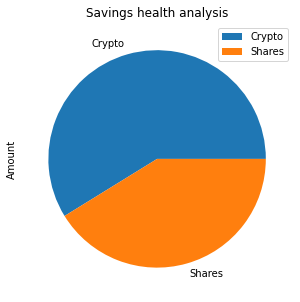

In [29]:
# Plot savings pie chart

df_savings.plot.pie(y="Amount", title="Savings health analysis", figsize=(15,5))

In [30]:
# Set ideal emergency fund

emergency_fund = monthly_income * 3

print(f"The total value of the emergency fund is ${emergency_fund}")

The total value of the emergency fund is $36000


In [31]:
# Calculate total amount of savings

total_savings = total_crypto_holdings + total_share_holdings

print(f"The total amount of savings is ${total_savings}")

The total amount of savings is $107209.3275414


In [32]:
# Validate saving health

# Below is an if conditional statement that validates if the current savings are enough for an emergency fund

if total_savings > emergency_fund:
    print("Well done! Your total savings is higher than the emergency fund. Keep up the great work")
elif total_savings == emergency_fund:
    print("Well done! You have saved enough money to match the emergency fund. Keep up the great work")
elif total_savings < emergency_fund: 
    print(f"You're almost there! You need to still need to save ${total_savings - emergency_fund}")

Well done! Your total savings is higher than the emergency fund. Keep up the great work


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [33]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [34]:
# Get 5 years' worth of historical data for SPY and AGG

tickers = ["AGG", "SPY"]

timeframe = "1D"

df_portfolio_mc = alpaca.get_barset(tickers, timeframe, start = today, end = today).df

# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_portfolio_mc1000 = alpaca.get_barset(tickers, timeframe, start = today, limit = 1000).df

# Display sample data

df_portfolio_mc1000

AGG                                        \
                              open      high      low   close     volume   
time                                                                       
2017-06-30 00:00:00-04:00  109.620  109.6273  109.460  109.49  2201175.0   
2017-07-03 00:00:00-04:00  109.300  109.3000  109.010  109.08  1681516.0   
2017-07-05 00:00:00-04:00  109.080  109.1800  109.000  109.15  2694196.0   
2017-07-06 00:00:00-04:00  108.950  109.0000  108.820  108.95  2057393.0   
2017-07-07 00:00:00-04:00  108.890  108.9500  108.830  108.87  2536724.0   
...                            ...       ...      ...     ...        ...   
2021-06-16 00:00:00-04:00  115.070  115.1285  114.510  114.63  7527672.0   
2021-06-17 00:00:00-04:00  114.792  115.2500  114.785  114.99  7417691.0   
2021-06-18 00:00:00-04:00  115.050  115.3900  114.910  115.29  5438261.0   
2021-06-21 00:00:00-04:00  115.060  115.1200  114.921  114.96  4934966.0   
2021-06-22 00:00:00-04:00  114.830  115.1400  114.830  115.11  5299846.0   

                              SPY                                        
                             open      high     low   close      volume  
time                                                                     
2017-06-30 00:00:00-04:00     NaN       NaN     NaN     NaN         NaN  
2017-07-03 00:00:00-04:00  242.91  243.3800  242.29  242.32  27234078.0  
2017-07-05 00:00:00-04:00  242.62  243.0100  241.70  242.77  41067682.0  
2017-07-06 00:00:00-04:00  241.88  242.0300  240.34  240.58  52390161.0  
2017-07-07 00:00:00-04:00  241.21  242.2800  241.02  242.10  36831437.0  
...                           ...       ...     ...     ...         ...  
2021-06-16 00:00:00-04:00  424.63  424.8700  419.92  422.12  73638324.0  
2021-06-17 00:00:00-04:00  421.67  423.0200  419.32  421.97  71991686.0  
2021-06-18 00:00:00-04:00  417.08  417.8281  414.70  415.01  92753385.0  
2021-06-21 00:00:00-04:00  416.80  421.0600  415.93  420.85  63727942.0  
2021-06-22 00:00:00-04:00  420.85  424.0000  420.08  423.06  50857233.0  

[1001 rows x 10 columns]

In [35]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

mc_thirty_year = MCSimulation(
    portfolio_data = df_portfolio_mc1000,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30)

In [36]:
# Printing the simulation input data

mc_thirty_year.portfolio_data.head() 

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2017-06-30 00:00:00-04:00  109.62  109.6273  109.46  109.49  2201175.0   
2017-07-03 00:00:00-04:00  109.30  109.3000  109.01  109.08  1681516.0   
2017-07-05 00:00:00-04:00  109.08  109.1800  109.00  109.15  2694196.0   
2017-07-06 00:00:00-04:00  108.95  109.0000  108.82  108.95  2057393.0   
2017-07-07 00:00:00-04:00  108.89  108.9500  108.83  108.87  2536724.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-06-30 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-07-03 00:00:00-04:00    -0.003745  242.91  243.38  242.29  242.32   
2017-07-05 00:00:00-04:00     0.000642  242.62  243.01  241.70  242.77   
2017-07-06 00:00:00-04:00    -0.001832  241.88  242.03  240.34  240.58   
2017-07-07 00:00:00-04:00    -0.000734  241.21  242.28  241.02  242.10   

                                                    
                               volume daily_return  
time                                                
2017-06-30 00:00:00-04:00         NaN          NaN  
2017-07-03 00:00:00-04:00  27234078.0          NaN  
2017-07-05 00:00:00-04:00  41067682.0     0.001857  
2017-07-06 00:00:00-04:00  52390161.0    -0.009021  
2017-07-07 00:00:00-04:00  36831437.0     0.006318

In [37]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

mc_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995982,0.997680,0.998111,1.000034,0.992190,0.993702,0.997989,0.993767,1.004034,1.000135,...,0.997638,1.000719,0.995216,1.001152,0.994586,1.002907,0.986118,1.003088,0.992347,0.999762
2,0.994711,0.990780,1.001742,0.997301,0.992118,0.990685,0.994390,0.990212,0.998939,0.998832,...,0.999144,0.998269,0.986915,1.001145,0.993496,1.005179,0.984747,1.000886,1.000928,0.993084
3,1.001601,0.992751,1.007784,0.995328,0.996280,0.980352,1.003388,0.996799,0.997294,0.996170,...,1.003447,1.004638,0.983354,1.004762,0.991859,1.009486,0.985248,1.006541,1.012251,0.994187
4,0.998526,0.988774,1.006124,0.993928,0.999530,0.972916,1.002193,0.990667,0.992825,0.998403,...,0.993021,1.007497,0.987683,0.997383,0.982615,1.011796,0.992843,1.006913,1.012661,0.994089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.843955,4.002123,7.241676,13.173687,11.994366,6.877922,7.052096,5.531923,7.497634,3.400050,...,4.256178,8.923171,6.347604,6.560002,3.840606,4.964881,3.563325,12.377553,7.048385,12.654773
7557,2.842572,4.000372,7.245218,13.198724,11.925400,6.957293,7.059483,5.496243,7.539919,3.406147,...,4.279418,8.950973,6.349013,6.594112,3.830303,5.009266,3.560682,12.243939,7.014819,12.703270
7558,2.837600,4.007526,7.231328,13.252820,11.997119,6.959075,7.015669,5.483860,7.544779,3.401454,...,4.223630,8.949531,6.349203,6.566926,3.800621,5.043614,3.579587,12.351720,7.014672,12.629928
7559,2.840815,4.000628,7.172899,13.172249,11.961970,6.979393,7.021253,5.487217,7.501414,3.370302,...,4.224188,8.934750,6.354554,6.581777,3.776726,5.052491,3.574580,12.408053,7.001784,12.586076


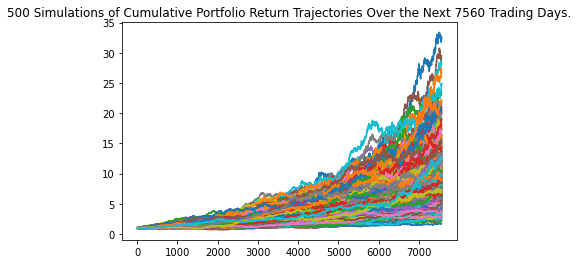

In [38]:
# Plot simulation outcomes

mc_thirty_year_plot = mc_thirty_year.plot_simulation()

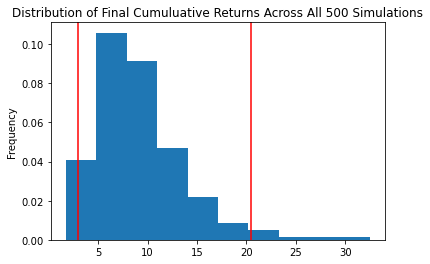

In [39]:
# Plot probability distribution and confidence intervals

dist_plot_thirty_year = mc_thirty_year.plot_distribution()

### Retirement Analysis

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results

thirty_year_summary = mc_thirty_year.summarize_cumulative_return()

# Print summary statistics

print(thirty_year_summary)

count           500.000000
mean              9.179046
std               4.419558
min               1.723916
25%               6.158664
50%               8.459489
75%              11.287014
max              32.525854
95% CI Lower      2.959490
95% CI Upper     20.474606
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [41]:
# Set initial investment

initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(thirty_year_summary[8]* initial_investment,2)
ci_upper = round(thirty_year_summary[9]* initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $59189.8 and $409492.12


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [42]:
# Set initial investment

initial_investment_30000 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(thirty_year_summary[8]* initial_investment_30000,2)
ci_upper = round(thirty_year_summary[9]* initial_investment_30000,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment_30000} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $88784.7 and $614238.18


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

mc_five_year = MCSimulation(
    portfolio_data = df_portfolio_mc1000,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5)

In [44]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

mc_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001643,0.999705,0.998787,0.997556,1.003529,0.989256,0.996026,0.992066,0.996296,0.997835,...,0.997649,0.990494,0.997398,1.003317,0.999369,1.005639,0.997116,0.999327,0.997729,0.996417
2,1.006638,0.998627,1.004151,0.990914,1.008104,0.982591,1.005706,0.995745,0.984877,1.008127,...,0.996461,0.986852,0.996385,1.005919,0.996220,1.002920,1.003685,0.990513,0.995106,0.987167
3,1.011971,0.988896,1.007417,1.000111,1.009309,0.977502,1.001868,0.997362,0.989186,1.008814,...,0.989754,0.987859,0.996177,1.010815,0.998174,1.008089,0.996740,0.984502,0.994755,0.987124
4,1.006823,0.994297,0.997301,1.005785,1.011417,0.980319,1.005373,0.997327,0.988361,1.012639,...,0.989345,1.000393,0.996156,1.005117,0.998889,1.018685,1.000420,0.988134,1.003652,0.980666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.086955,1.827418,1.738844,1.559309,1.384348,1.588288,1.256012,1.625889,1.529119,1.567578,...,1.267111,2.633931,1.118338,1.213586,1.402039,1.115902,1.309403,1.473262,1.157620,0.920814
1257,1.090725,1.799613,1.737108,1.569712,1.396626,1.582837,1.259120,1.625746,1.512796,1.583891,...,1.271437,2.657668,1.118886,1.205573,1.404808,1.122320,1.312439,1.473665,1.158915,0.918151
1258,1.088033,1.806324,1.729201,1.563366,1.395730,1.582461,1.263099,1.626754,1.507433,1.584751,...,1.271395,2.654743,1.130223,1.211994,1.401760,1.120313,1.316565,1.463199,1.155768,0.913791
1259,1.088933,1.805161,1.717530,1.561362,1.399355,1.579639,1.264572,1.624594,1.522275,1.585068,...,1.269018,2.615757,1.136605,1.210073,1.407688,1.129654,1.317711,1.472491,1.152830,0.915600


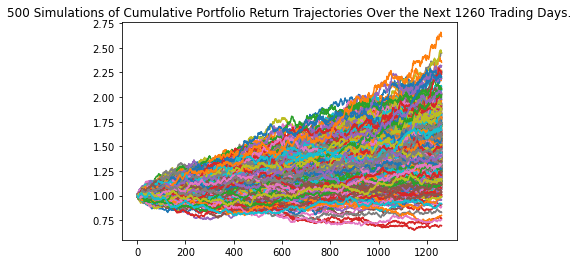

In [45]:
# Plot simulation outcomes

mc_five_year_plot = mc_five_year.plot_simulation()

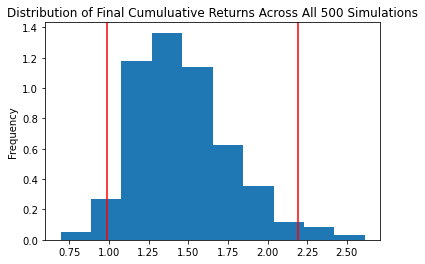

In [46]:
# Plot probability distribution and confidence intervals

dist_plot_five_year = mc_five_year.plot_distribution()


In [47]:
# Fetch summary statistics from the Monte Carlo simulation results

mc_five_year_summary = mc_five_year.summarize_cumulative_return()

# Print summary statistics

mc_five_year_summary 

count           500.000000
mean              1.461171
std               0.303883
min               0.695153
25%               1.242886
50%               1.418006
75%               1.630949
max               2.613759
95% CI Lower      0.990524
95% CI Upper      2.192499
Name: 1260, dtype: float64

In [48]:
# Set initial investment

# Note initial investment increase from 20,000 to 40,000

initial_investment_five_year = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = round(mc_five_year_summary [8]* initial_investment_five_year,2)
ci_upper_five = round(mc_five_year_summary [9]* initial_investment_five_year,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment_five_year} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 5 years will end within in the range of $39620.96 and $87699.95


### Ten Years Retirement Option

In [49]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

mc_ten_year = MCSimulation(
    portfolio_data = df_portfolio_mc1000,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10)

In [50]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

mc_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005123,0.983809,0.993452,1.017417,0.998643,0.988800,1.003683,1.018869,0.992753,0.996782,...,0.993423,1.002976,1.000538,1.003972,1.001732,0.990740,1.000374,0.991788,0.994342,0.999328
2,1.002456,0.974139,1.002280,1.023781,0.992737,0.995215,1.005964,1.027096,0.993792,1.008065,...,0.991949,1.003429,0.992992,1.018132,1.006885,0.995455,0.996975,0.997401,0.993451,1.005641
3,1.009432,0.974873,1.006758,1.024493,0.989035,0.996330,1.001894,1.020274,0.994091,1.009529,...,1.002089,0.991859,0.998330,1.015163,0.999494,1.002252,0.993493,1.005154,0.977680,1.007870
4,1.014090,0.985236,0.999146,1.016068,0.990002,1.002636,1.002192,1.017975,0.989427,1.009491,...,1.001420,0.981270,0.988616,1.023930,0.999485,1.007531,0.991198,0.997227,0.978563,1.004841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.189989,1.574680,3.159499,1.990914,2.471347,2.227671,2.966993,2.830981,2.677322,2.319672,...,3.320967,3.009912,2.206861,2.894908,2.093481,3.503961,2.021324,3.443073,2.611955,2.734980
2517,2.189226,1.576439,3.135185,2.006972,2.487803,2.241470,2.966144,2.815837,2.694148,2.337209,...,3.328766,3.030101,2.201886,2.895944,2.091765,3.528304,1.996997,3.427396,2.597683,2.726836
2518,2.207136,1.589452,3.121497,2.000272,2.469264,2.229444,2.940466,2.820442,2.685163,2.343616,...,3.324288,3.034937,2.199847,2.915089,2.098579,3.553609,1.990290,3.432939,2.608863,2.698710
2519,2.229815,1.587100,3.131722,1.986920,2.480890,2.223440,2.977707,2.802621,2.682119,2.357665,...,3.310994,3.032035,2.187831,2.922304,2.112605,3.552022,1.983108,3.451251,2.619372,2.700475


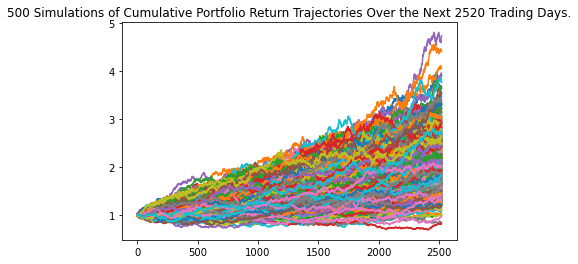

In [51]:
# Plot simulation outcomes

mc_ten_year_plot = mc_ten_year.plot_simulation()

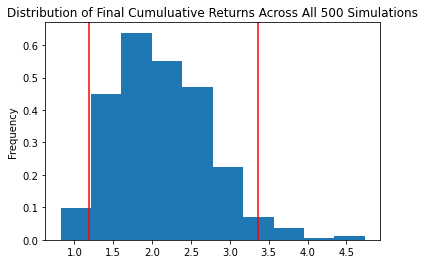

In [52]:
# Plot probability distribution and confidence intervals

dist_plot_ten_year = mc_ten_year.plot_distribution()


In [53]:
# Fetch summary statistics from the Monte Carlo simulation results

mc_ten_year_summary = mc_ten_year.summarize_cumulative_return()

# Print summary statistics

mc_ten_year_summary 


count           500.000000
mean              2.109574
std               0.614915
min               0.820165
25%               1.653618
50%               2.045405
75%               2.539455
max               4.737082
95% CI Lower      1.186654
95% CI Upper      3.363480
Name: 2520, dtype: float64

In [54]:
# Set initial investment

# Note initial investment increase from 20,000 to 40,000

initial_investment_ten_year = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_ten = round(mc_ten_year_summary [8]* initial_investment_ten_year,2)
ci_upper_ten = round(mc_ten_year_summary [9]* initial_investment_ten_year,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $47466.16 and $134539.21
